In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pygal
from pygal.style import Style
import lxml
import tinycss
import cssselect
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
data = pd.read_excel('pensiaAllYears3.xlsx')
data = data.drop('Unnamed: 0', axis=1)
data['FUND_CLASSIFICATION'] = data.loc[:,'FUND_CLASSIFICATION'].apply(lambda x: x[::-1])
data['MANAGING_CORPORATION_TINY'] = data.loc[:,'MANAGING_CORPORATION_TINY'].apply(lambda x: x[::-1])

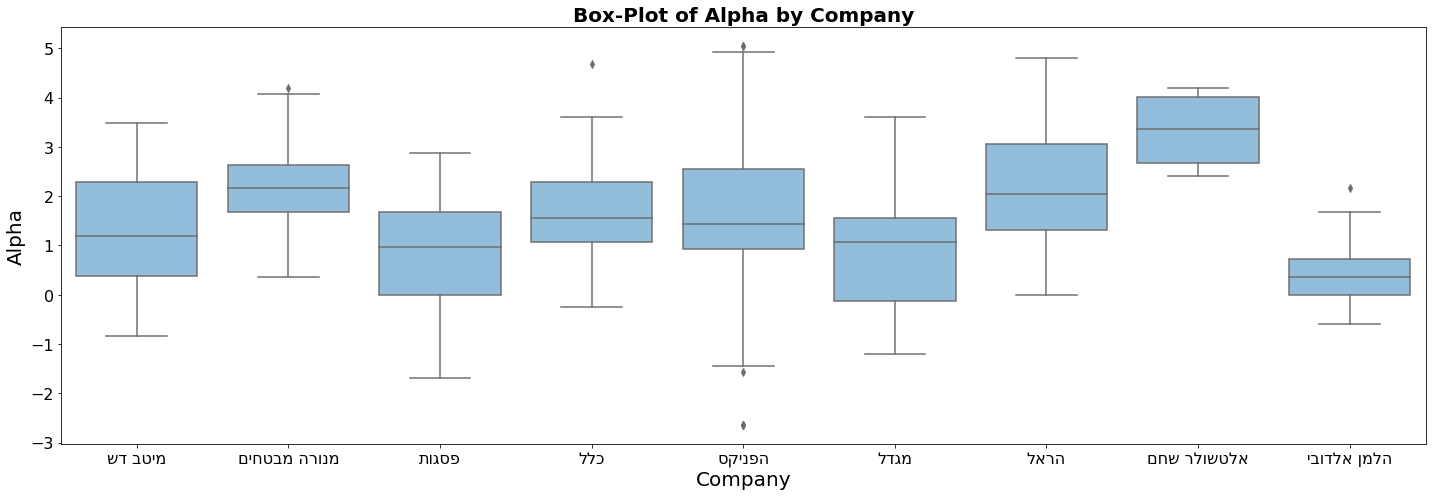

In [17]:
#### Box plot of alpha by years and fund classification
plt.figure(figsize=(20,7))
ax = sns.boxplot(x="MANAGING_CORPORATION_TINY", y="ALPHA",
                 data=data, palette=['#85C1E9'])
plt.title('Box-Plot of Alpha by Company', fontweight='bold', fontsize=20)
plt.xlabel('Company', fontsize=20)
plt.ylabel('Alpha',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Fund Type', fontsize=16, title_fontsize=20)
plt.tight_layout()
plt.savefig('AlphaBoxPlot.jpeg')

In [7]:
#### Interactive Radar plot
fundName = 'לבני 50 ומטה'
dataRadar = data[data['FUND_NAME2'] == fundName]  # choose specific age range

means = dataRadar.groupby(['MANAGING_CORPORATION_TINY']).median()
means = means[['STOCK_MARKET_EXPOSURE', 'FOREIGN_EXPOSURE', 'FOREIGN_CURRENCY_EXPOSURE',
               'YEAR_TO_DATE_YIELD', 'MONTHLY_YIELD', 'AVG_ANNUAL_MANAGEMENT_FEE', 'AVG_DEPOSIT_FEE',
               'ALPHA', 'SHARPE_RATIO', 'LIQUID_ASSETS_PERCENT']]

means['LIQUID_ASSETS_PERCENT']= means['LIQUID_ASSETS_PERCENT']/100
means['FOREIGN_EXPOSURE']= means['FOREIGN_EXPOSURE']/100
means['STOCK_MARKET_EXPOSURE']= means['STOCK_MARKET_EXPOSURE']/100
means['FOREIGN_CURRENCY_EXPOSURE']= means['FOREIGN_CURRENCY_EXPOSURE']/100

means[['STOCK_MARKET_EXPOSURE', 'FOREIGN_EXPOSURE', 'FOREIGN_CURRENCY_EXPOSURE',
               'YEAR_TO_DATE_YIELD', 'MONTHLY_YIELD', 'AVG_ANNUAL_MANAGEMENT_FEE', 'AVG_DEPOSIT_FEE',
               'ALPHA', 'SHARPE_RATIO', 'LIQUID_ASSETS_PERCENT']] = MinMaxScaler().fit_transform(means[['STOCK_MARKET_EXPOSURE', 'FOREIGN_EXPOSURE', 'FOREIGN_CURRENCY_EXPOSURE',
               'YEAR_TO_DATE_YIELD', 'MONTHLY_YIELD', 'AVG_ANNUAL_MANAGEMENT_FEE', 'AVG_DEPOSIT_FEE',
               'ALPHA', 'SHARPE_RATIO', 'LIQUID_ASSETS_PERCENT']])

means = means[['YEAR_TO_DATE_YIELD', 'MONTHLY_YIELD', 'AVG_ANNUAL_MANAGEMENT_FEE', 'AVG_DEPOSIT_FEE',
               'ALPHA', 'SHARPE_RATIO', 'LIQUID_ASSETS_PERCENT']]

means = means.rename(columns={"YEAR_TO_DATE_YIELD": "Cumulative Annual Yield", "MONTHLY_YIELD": "Monthly Yield",
                              "AVG_ANNUAL_MANAGEMENT_FEE": "Annual Management Fee", "AVG_DEPOSIT_FEE": 'Deposit Fee', "ALPHA": "Alpha",
                              "SHARPE_RATIO": "Sharpe Ratio", "LIQUID_ASSETS_PERCENT": "Liquid Assets Percentage"})

means = means.round(3)

custom_style = Style(
    font_family='googlefont:Raleway',
    title_font_size=28,
    value_font_size=12,
    tooltip_font_size=14,
    label_font_size=16,
    major_label_font_size=12,
    legend_font_size=24,
    colors=(["#EA5543", "#F786AD", "#EF9C1F", "#FFF200", "#B43DC7", "#7CD185", "#11823B", "#519BFF", "#283197"]),
    stroke_width=3
    )

radar_chart = pygal.Radar(style=custom_style)
radar_chart.title = 'Performance Measures by Company\nFunds for age group: Under 50 Years Old'
radar_chart.x_labels =means.columns

radar_chart.add('הלמן אלדובי', means.iloc[0, :])
radar_chart.add('הראל',  means.iloc[1, :])
radar_chart.add('מגדל',  means.iloc[2, :])
radar_chart.add('כלל',  means.iloc[3, :])
radar_chart.add('אלטשולר שחם',  means.iloc[4, :])
radar_chart.add('מנורה מבטחים',  means.iloc[5, :])
radar_chart.add('הפניקס',  means.iloc[6, :])
radar_chart.add('מיטב דש',  means.iloc[7, :])
radar_chart.add('פסגות',  means.iloc[8, :])

radar_chart.render_to_file('radar.svg')

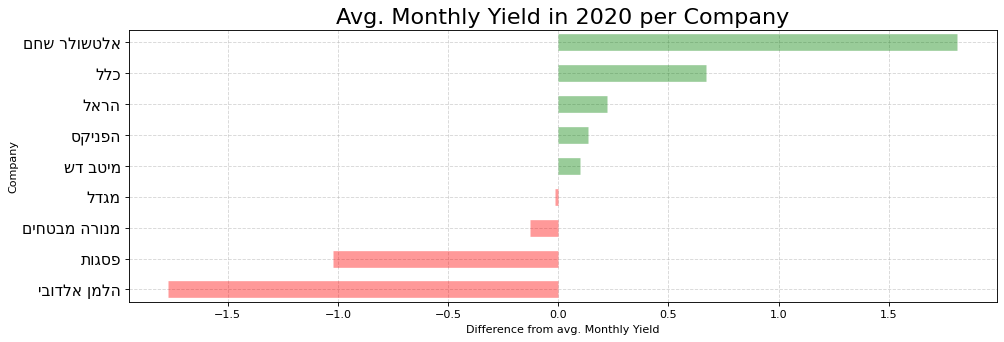

In [4]:
#### Bar plot of avg. monthly yield
df = pd.DataFrame(data=data, columns=data.columns)
df = df.drop(df[df.YEAR < 2020].index) #only 2020 year
df = df[["MANAGING_CORPORATION_TINY", "MONTHLY_YIELD"]]
df. dropna()
df = df.groupby(['MANAGING_CORPORATION_TINY']).mean()

x = df.loc[:, ['MONTHLY_YIELD']] #mpg column
df['MONTHLY_YIELD'] = df['MONTHLY_YIELD'] - 0.371732955 #avg for 2020

df['MONTHLY_YIELD_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['MONTHLY_YIELD_z']]
df.sort_values('MONTHLY_YIELD_z', inplace=True)
df.reset_index(inplace=True)

#---
# Draw plot
plt.figure(figsize=(14,4.5), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.MONTHLY_YIELD_z, color=df.colors, alpha=0.4, linewidth=15)

# # Decorations
plt.gca().set(ylabel='Company', xlabel='Difference from avg. Monthly Yield')
plt.yticks(df.index, df.MANAGING_CORPORATION_TINY, fontsize=14)
plt.title('Avg. Monthly Yield in 2020 per Company', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)

plt.savefig('MonthlyYieldBarPlot.jpeg')